### Importing the Dataset

In [18]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df = pd.read_excel('DATASET.xlsx')
df

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3.0,117.0,2600.0,400.0,0.0,0.0,0.0,0.0,1.520
1,NaN,2,324.0,161.1,18.2,0.0,4.0,106.0,5950.0,1190.0,0.0,3.4,0.0,0.0,1.620
2,NaN,3,324.0,170.7,18.5,0.0,4.0,110.0,5950.0,1190.0,0.0,21.3,0.0,4.0,1.680
3,NaN,4,324.0,223.9,18.9,0.0,3.0,110.0,6150.0,1340.0,0.0,21.3,0.0,5.0,1.780
4,NaN,5,324.0,228.2,18.4,0.0,2.0,113.0,6340.0,1450.0,0.0,23.9,0.0,7.0,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,NaN,6,454.0,931.8,13.6,125.0,13.0,116.0,4150.0,830.0,15.1,1.8,1.0,15.0,1.681
1006,NaN,7,454.0,703.0,14.5,17.0,13.0,118.0,4150.0,830.0,24.6,7.9,2.0,15.0,1.838
1007,NaN,8,454.0,1124.1,14.9,45.0,18.0,117.0,4200.0,840.0,119.0,15.7,2.0,16.0,1.862
1008,NaN,9,454.0,1462.3,13.2,62.0,27.0,117.0,4400.0,720.0,138.2,30.5,6.0,18.0,1.883


### Data Preprocessing

In [21]:
df.fillna(0, inplace=True)
df.columns = df.columns.str.replace('Unnamed: 0', 'Section')

j = 0
for i in range(101):
  df.iloc[j:j + 10, 0] = df.iloc[j, 0]
  j += 10

df_test = df.loc[df['year'] == 10]
df_test

,Section,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
9,Sec_1,10,324.0,53.6,19.0,0.0,2.0,105.0,7567.0,1885.0,16.8,105.0,65.0,9.0,1.960
19,Sec_2,10,327.7,62.0,22.7,0.0,2.0,102.0,30525.0,10234.0,76.5,44.3,5.0,9.0,0.795
29,Sec_3,10,487.7,93.2,22.5,0.0,4.0,110.0,2140.0,1270.0,78.5,0.0,0.0,16.0,1.432
39,Sec_4,10,543.6,93.2,22.5,0.0,4.0,110.0,2140.0,1270.0,28.5,60.5,67.0,11.0,2.004
49,Sec_5,10,434.4,149.0,11.7,72.0,3.0,110.0,13142.0,6225.0,0.0,276.2,34.0,6.0,1.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,Sec_97,10,514.0,1226.4,10.1,203.6,16.0,114.0,7672.0,303.0,219.7,206.2,10.0,8.0,1.607
979,Sec_98,10,901.0,1531.0,11.1,34.9,40.0,100.0,15150.0,1077.0,5.9,74.5,33.0,13.0,1.087
989,Sec_99,10,1181.0,1364.9,9.2,274.3,24.0,112.0,12500.0,880.0,131.4,72.4,18.0,12.0,0.996
999,Sec_100,10,662.0,1110.7,12.8,33.2,27.0,117.0,3324.0,1356.0,193.7,305.6,180.0,12.0,2.212


### Applying the Model

In [22]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

In [23]:
etr = ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=100,
                    min_impurity_decrease=0.0, 
                    min_samples_leaf=1,
                    min_weight_fraction_leaf=0.1,
                    n_jobs=None, oob_score=False, random_state=1, verbose=0,
                    warm_start=False)

In [24]:
predicted = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}
names = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']

In [41]:
rmse = []
N = 0
index = 0
for j in [10, 11, 12, 13, 14]:
  ans = 0
  count = 0
  for i in range(0, 1000, 10):
    xtrain = df.iloc[i:i+9, 1:10]
    ytrain = df.iloc[i:i+9, j]
    xtest = df.iloc[i+9, 1:10].to_numpy()
    ytest = df.iloc[i+9, j]
    etr.fit(xtrain, ytrain)
    ypred = etr.predict(xtest.reshape(1,-1))[0]
    predicted[names[index]].append(ypred)
    ans += (ytest - ypred)**2
    count += 1
    N += 1
  rmse.append(ans)
  index += 1

In [42]:
df_pred = pd.DataFrame.from_dict(predicted)
df_pred

,Para-9,Para-10,Para-11,Para-12,Para-13
0,3.200,56.855,49.59,7.98,1.907400
1,58.534,28.591,0.96,7.86,0.792600
2,70.542,0.000,0.00,13.20,1.378690
3,20.594,55.028,58.61,7.52,1.871520
4,0.000,259.336,34.00,5.99,1.760880
...,...,...,...,...,...
195,0.000,124.525,15.55,3.88,1.398460
196,177.662,186.289,9.49,7.69,1.546750
197,5.116,69.300,23.22,11.90,1.074463
198,114.531,64.392,14.36,11.69,0.968200


In [43]:
for i in rmse:
  print((i/count)**0.5)

60.825598651924516
64.50991002644479
25.681448907723254
14.592179891983234
0.2667654867342664


In [47]:
#Final Total RMSE
print((sum(rmse)/N)**0.5)

41.79430975338608


### Plotting the Graphs

In [45]:
import random
ind = []
for i in range(30):
  ind.append(random.randint(0,100))
ind

[62,
 48,
 48,
 85,
 89,
 57,
 25,
 35,
 13,
 73,
 79,
 52,
 11,
 45,
 59,
 11,
 10,
 25,
 92,
 55,
 39,
 100,
 42,
 23,
 68,
 52,
 13,
 13,
 77,
 4]

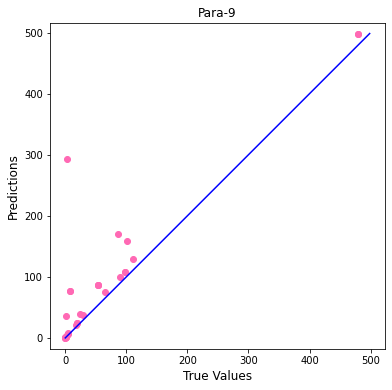

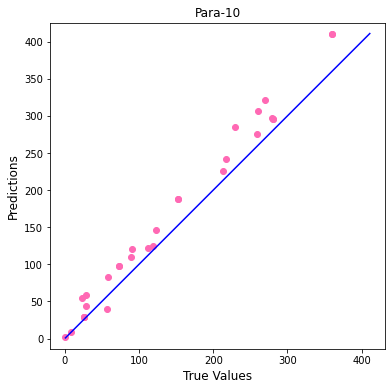

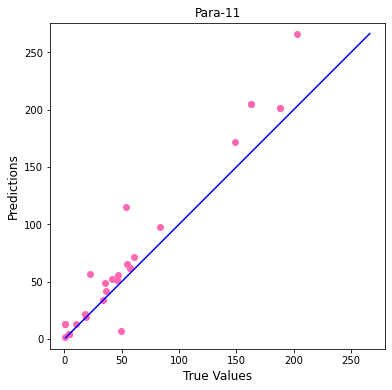

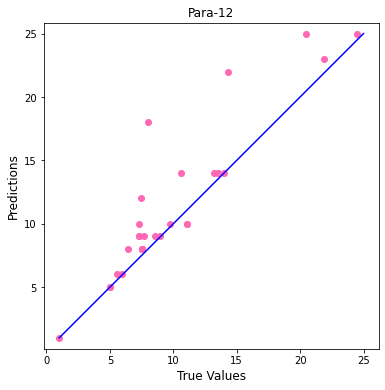

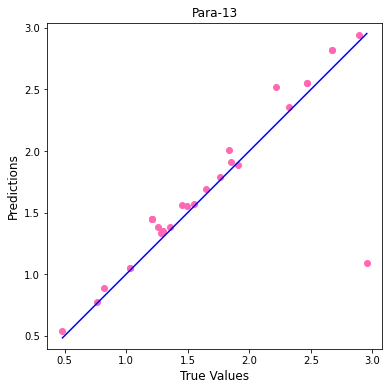

In [46]:
for i in range(5):
  plt.figure(figsize=(6,6))
  true_value = df_pred.iloc[ind, i]
  predicted_value = df_test.iloc[ind, i + 10]
  plt.scatter(true_value, predicted_value, c='hotpink')

  p1 = max(max(predicted_value), max(true_value))
  p2 = min(min(predicted_value), min(true_value))
  plt.plot([p1, p2], [p1, p2], 'b-')
  plt.title(names[i])
  plt.xlabel('True Values', fontsize=12)
  plt.ylabel('Predictions', fontsize=12)
  plt.axis('equal')
  plt.show()